In [146]:
from mnist import MNIST 
import numpy as np
from pylab import *
from matplotlib import colors
%matplotlib inline

mndata = MNIST('./data')

mndata.load_training()
img_side = 28
n_mnist_pixels = img_side*img_side

In [147]:
labels = mndata.train_labels

cluster_size = 10
train_inputs_idx = []
for idx in [0, 4]:
    label_idx = np.where(np.isin(labels,[idx]))[0][:cluster_size]
    train_inputs_idx.append(label_idx)

samples_idx = np.array(train_inputs_idx, dtype='int').flatten()
samples_idx.size

20

In [148]:
images = []
for sample_idx in samples_idx.flatten():
    images.append(mndata.train_images[sample_idx])

images = np.array(images, dtype='float')
images = images / 255
images.shape

(20, 784)

In [149]:
def simple_plot(T: list):
    T_arr = np.array(T, dtype=float)

    fig, axs = plt.subplots(1, 1, figsize=(50, 5), tight_layout=True)
    axs.plot(np.arange(T_arr.size), T_arr)


    plt.show()

In [150]:
from typing import Literal

def show_image(image: ndarray, cmap: Literal['bone', 'Greys'] = 'bone'):
    # figure(figsize=(15, 10))

    imshow(np.array(image),
        interpolation='none',
        aspect='equal',
        cmap=cmap,
        )

    axis("off")

    show()

In [151]:
def get_discount_matrix(size, rev = False, cor_supr_size=0):
    a = np.arange(size)
    if rev:
        a = np.abs(np.abs(a - a[np.newaxis].T) - np.max(a))
    else:
        a = np.abs(a - a[np.newaxis].T)
    np.fill_diagonal(a, 0)

    if cor_supr_size > 0:
        a[:cor_supr_size] = 0
        a[:, 0:cor_supr_size] = 0
        a[-cor_supr_size:] = 0
        a[:, -cor_supr_size:] = 0

    return a

# a = get_discount_matrix(10, rev=True, cor_supr_size=2)
# a = np.array(a, dtype='float')
# # a[:, 0:2] = 0
# print(a)
# show_image(a, cmap='Greys')

In [152]:
def show_images_table(images_2d: ndarray, img_side: int = 28, row_size=10):
    column_size = int(images.shape[0] / row_size)

    shaped_images = images_2d.reshape(column_size, row_size, img_side, img_side)
    shaped_images = shaped_images.swapaxes(1, 2).reshape(column_size*img_side, row_size*img_side)

    figure(figsize=(15, 10))

    imshow(shaped_images,
           interpolation='none',
           aspect='equal',
           cmap='bone',
           )
    
    axis("off")

# show_images_table(images_2d=images)
images.shape

(20, 784)

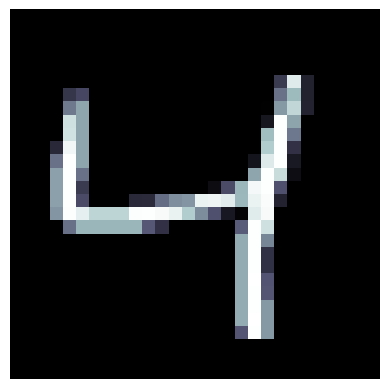

0.508313725490196
350
386
130.96050434985062


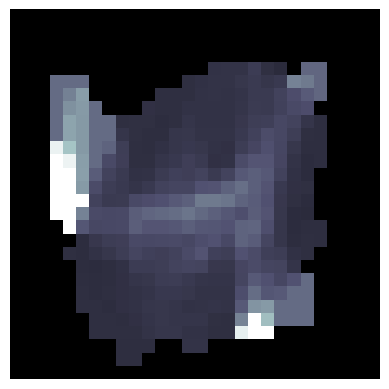

0.27142073440383546
0
36
28.365691357341284


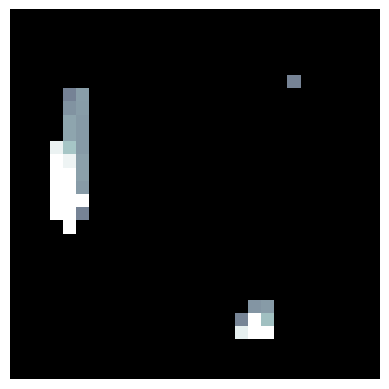

0.6303486968298064
15
36
28.30306536700797


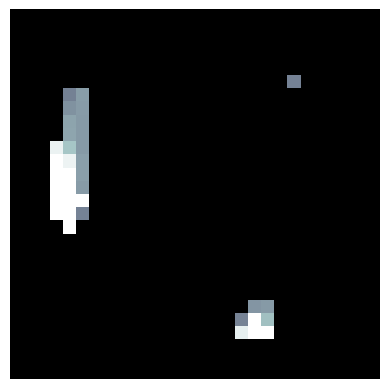

0.6289570081557327
15
36
23.04846472825244


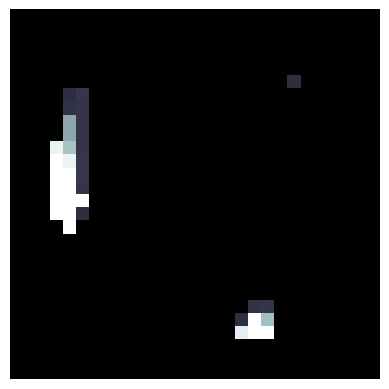

0.5121881050722766
15
36
20.854383287869354


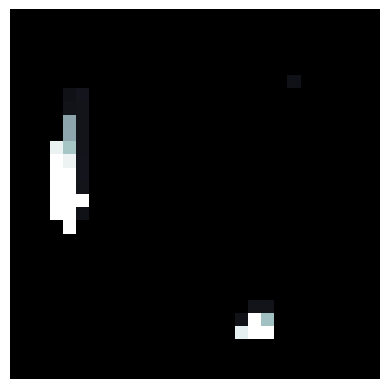

0.46343073973043014
15
36
20.103879240074335


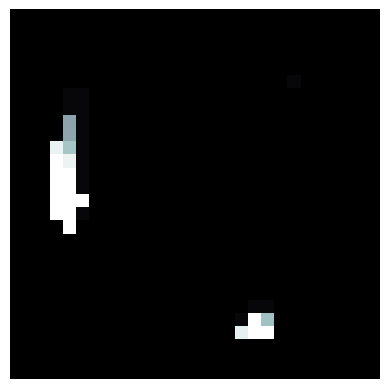

0.4467528720016518
15
36
19.848456057942393


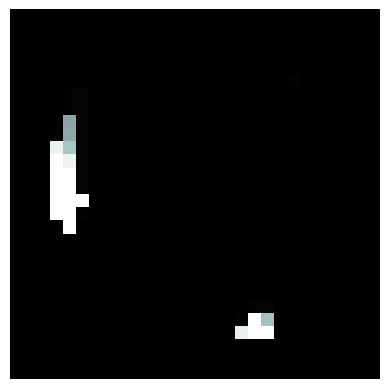

0.44107680128760873
15
36
19.743289277311455


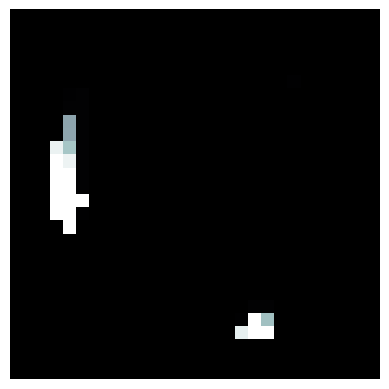

0.4387397617180323
15
36
19.68902749425481


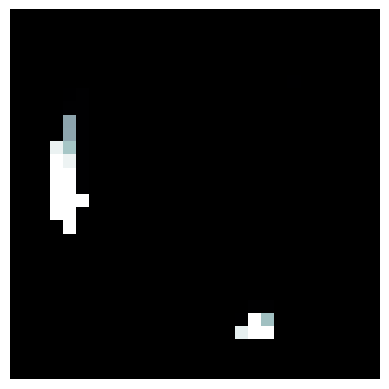

0.4375339443167736
15
36
19.656474771917345


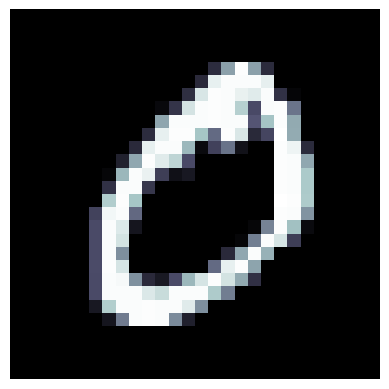

0.5542780748663102
110
386
261.8540997871753


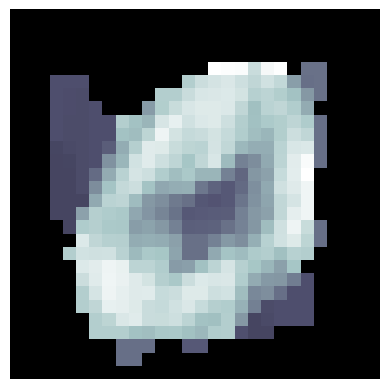

0.5427027974863735
23
297
222.9300948214343


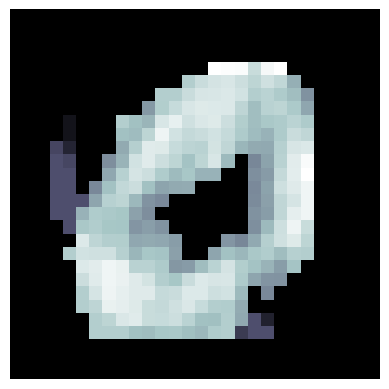

0.6004851038961193
18
274
215.65846717323143


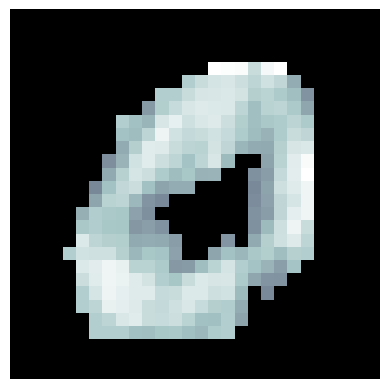

0.6296597581700188
27
274
208.1660597581332


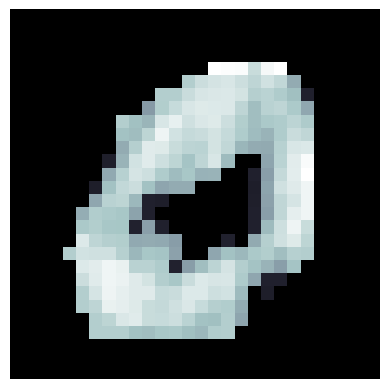

0.6077841160821408
27
274
203.68804759380976


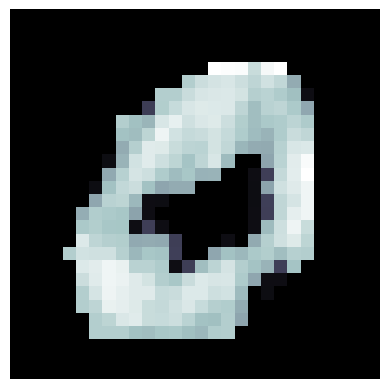

0.5947096280111234
27
274
202.0860587025869


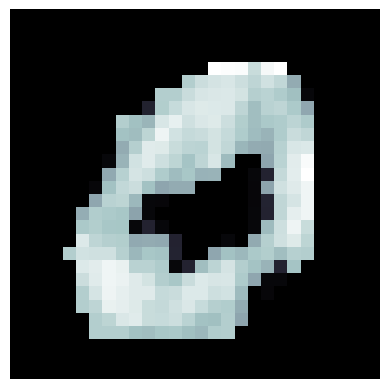

0.5900322881827355
27
274
201.3415685487118


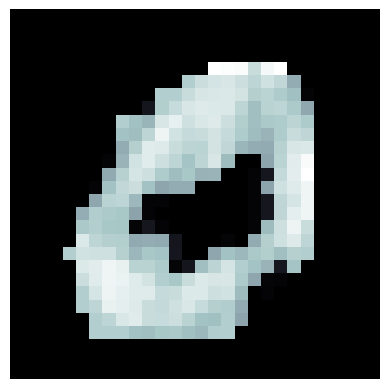

0.5878585943028083
27
274
200.93651196464123


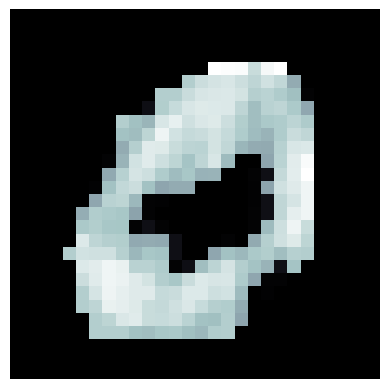

0.5866759473420182
27
274
200.6919032926872


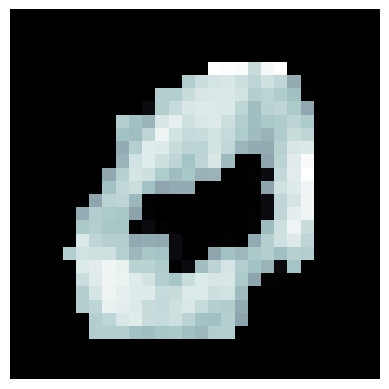

0.5859617614385028
27
274
200.532897360422


In [158]:
I = np.zeros(n_mnist_pixels)
O = np.zeros(n_mnist_pixels)

W = np.zeros((O.size, I.size))
NW = np.zeros((O.size, I.size))

pre_train_images_idx = [0, 1, 2, 3, 4, 10, 11, 12, 13, 14]

for img_idx in pre_train_images_idx:
    I = images[img_idx]
    W += I * I[np.newaxis].T

W /= np.sum(W, axis=1)[np.newaxis].T + 1e-30
    
W[300].sum()

# train

train_images_idx = [10, 0]

for img_idx in train_images_idx:
    I = images[img_idx]

    for iter_idx in range(10):
        show_image(image=I.reshape(img_side, img_side))

        SO = I * W
        O = np.sum(SO, axis=1)

        O *= (O > 0)

        O /= np.max(O)

        # thre
        threshold = np.mean(I[I > 0]) * 0.8
        print(threshold)

        excit_mask = O > threshold
        inh_mask = np.bitwise_and(O <= threshold, O > 0)
        print(inh_mask.sum())
        print((O > 0).sum())
        print(O.sum())

        dW = I * O[np.newaxis].T
        dW *= excit_mask[np.newaxis].T
        dW *= excit_mask

        W += dW

        dW = I * O[np.newaxis].T
        dW *= inh_mask[np.newaxis].T
        dW *= excit_mask

        W -= dW

        # recur
        I = np.copy(O)
    
    # W /= np.sum(W, axis=1)[np.newaxis].T + 1e-30